In [1]:
# load libraries for catboost regression
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

In [2]:
import pandas as pd
from glob import glob

# Find all CSV files starting with "test"
sample_files = glob('../data/sample*.csv')

# Initialize an empty list to store DataFrames
sample_data_frames = []

# Read each CSV file and append to the list
for file in sample_files:
    df = pd.read_csv(file)
    sample_data_frames.append(df)

# Concatenate all test DataFrames
combined_sample_data = pd.concat(sample_data_frames, ignore_index=True)



In [3]:
data = combined_sample_data

In [4]:
# split data into X and y and train and test predicting variable "TS"
X = data.drop('TS', axis=1)
y = data['TS']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)


In [5]:
# scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# create model
model = CatBoostRegressor(iterations=1000,
                          learning_rate=0.1,
                          depth=6,
                          loss_function='RMSE',
                          verbose=0)


In [6]:
# fit model
model.fit(X_train, y_train)


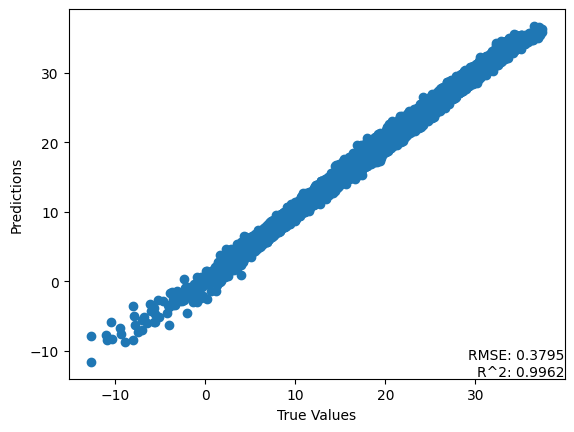

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming y_pred and y_test are defined
y_pred = model.predict(X_test)

# Scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# RMSE and R^2 calculation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Display RMSE and R^2 as text on the plot
plt.text(plt.xlim()[1], plt.ylim()[0],
         f'RMSE: {rmse:.4f}\nR^2: {r2:.4f}',
         verticalalignment='bottom',
         horizontalalignment='right',
         fontsize=10)

plt.show()


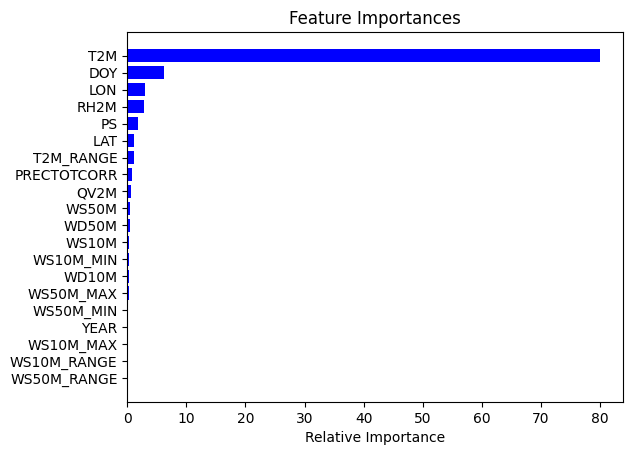

In [8]:
# plot feature importance horizontal bar chart rank from most to least important
importances = model.feature_importances_
indices = np.argsort(importances)
features = X.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [9]:
# save model with pickle
import pickle
filename = 'catboost_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [10]:
# list variables in data
pd.DataFrame(data.columns, columns=['Variable Name'])


,Variable Name
0,LAT
1,LON
2,YEAR
3,DOY
4,T2M
5,TS
6,T2M_RANGE
7,QV2M
8,RH2M
9,PRECTOTCORR


In [11]:
# use the model to predict the target variable on the data called "testData.csv"
# load data
data = pd.read_csv('../data/test3.csv')
data.head()

,LAT,LON,YEAR,DOY,T2M,TS,T2M_RANGE,QV2M,RH2M,PRECTOTCORR,...,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M
0,-30.75,22.25,2022,20,28.28,30.55,15.49,8.18,31.17,1.09,...,2.94,5.03,0.79,4.24,202.66,3.78,6.84,1.11,5.73,201.78
1,-30.75,22.75,2022,20,27.86,30.31,16.54,8.77,34.79,0.49,...,2.99,5.66,0.99,4.66,174.86,3.87,6.83,1.47,5.36,173.89
2,-30.75,23.25,2022,20,27.51,30.13,17.01,9.49,39.21,0.07,...,3.21,6.68,0.99,5.68,159.14,4.30,7.60,1.44,6.16,158.38
3,-30.75,23.75,2022,20,26.60,29.20,15.75,10.10,43.69,0.03,...,3.79,7.85,1.14,6.70,146.81,5.34,9.18,1.42,7.77,146.12
4,-30.75,24.25,2022,20,25.21,27.46,14.44,10.69,49.54,0.02,...,3.89,7.75,0.84,6.91,147.56,5.53,9.24,1.11,8.13,159.05


In [12]:
# split data into X and y and train and test predicting variable "TS"
X = data.drop('TS', axis=1)
y = data['TS']

# scale data
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [13]:
# load model
filename = 'catboost_model.pkl'
model = pickle.load(open(filename, 'rb'))


In [14]:
# predict target variable
y_pred = model.predict(X)
pd.DataFrame(y_pred, columns=['Predicted TS'])

,Predicted TS
0,30.288069
1,30.181099
2,30.954588
3,28.514780
4,26.035043
...,...
19651,25.577649
19652,23.719156
19653,22.482662
19654,21.488373


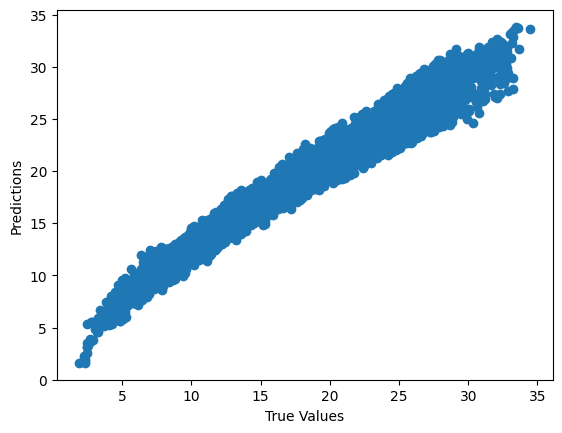

In [15]:
# plot predictions vs actual
import matplotlib.pyplot as plt
plt.scatter(y, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [16]:
# print RMSE and R^2
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(y, y_pred)))
print('R^2:', r2_score(y, y_pred))


RMSE: 1.9143548340530985
R^2: 0.9213366795190223
